Howework 2: Classification of Cifar-10 images using Keras
        
Name: Akwasi Darkwah Akwaboah

Large Network (8 layers) 512 nodes each

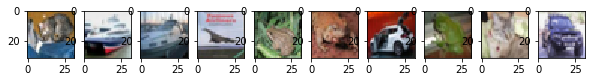

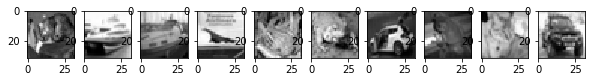

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 19s 482us/sample - loss: 2.1207 - acc: 0.1993 - val_loss: 2.0111 - val_acc: 0.2509
Epoch 2/20
40000/40000 [==============================] - 19s 472us/sample - loss: 1.9978 - acc: 0.2664 - val_loss: 1.9620 - val_acc: 0.2905
Epoch 3/20
40000/40000 [==============================] - 19s 474us/sample - loss: 1.9430 - acc: 0.2955 - val_loss: 1.9608 - val_acc: 0.2941
Epoch 4/20
40000/40000 [==============================] - 19s 469us/sample - loss: 1.8967 - acc: 0.3133 - val_loss: 1.9158 - val_acc: 0.3118
Epoch 5/20
40000/40000 [==============================] - 19s 472us/sample - loss: 1.8584 - acc: 0.3306 - val_loss: 1.8650 - val_acc: 0.3241
Epoch 6/20
40000/40000 [==============================] - 19s 473us/sample - loss: 1.8252 - acc: 0.3423 - val_loss: 1.8470 - val_acc: 0.3390
Epoch 7/20
40000/40000 [==============================] - 19s 468us/sample - loss: 1.7967 - acc: 0.3554 

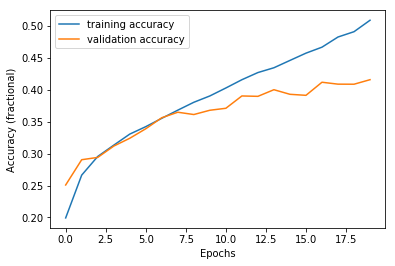

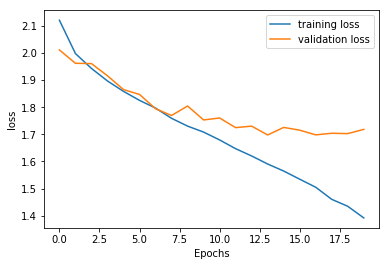

In [59]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#1. Plotting the first 10 cifar10 images
# fig, axes = plt.subplots(1, 10, figsize=(10,5))
# for img, ax in zip(x_train[:10], axes):
#   ax.imshow(img)
# plt.show()

#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train_norm = np.float32(x_train/255.0)
x_test_norm = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)

#3. function to convert to grayscale
def grayscale(data, dtype='float32'):
  # luma coding weighted average in video systems
  r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
  rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
  # add channel dimension
  rst = np.expand_dims(rst, axis=3)
  return rst

#function Call
X_train_gray = grayscale(x_train_norm)
X_test_gray = grayscale(x_test_norm)


#plot a few grayscale vrs rgb
fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(x_test[:10], axes):
  ax.imshow(img)
plt.show()

fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(X_test_gray[:10], axes):
  ax.imshow(img[:,:,0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

#create ANN model
#model constants

#define network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 1)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(X_train_gray, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(X_test_gray, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(X_test_gray)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')


Smaller network: 4-layers (tapering 512-256-64-32)

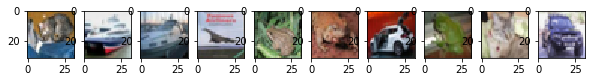

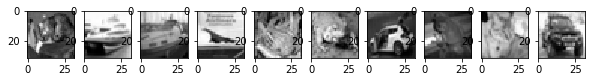

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 6s 138us/sample - loss: 2.0931 - acc: 0.2317 - val_loss: 2.0055 - val_acc: 0.2728
Epoch 2/20
40000/40000 [==============================] - 5s 127us/sample - loss: 1.9495 - acc: 0.2937 - val_loss: 1.9086 - val_acc: 0.3084
Epoch 3/20
40000/40000 [==============================] - 5s 126us/sample - loss: 1.8782 - acc: 0.3266 - val_loss: 1.8668 - val_acc: 0.3341
Epoch 4/20
40000/40000 [==============================] - 5s 127us/sample - loss: 1.8320 - acc: 0.3471 - val_loss: 1.8349 - val_acc: 0.3386
Epoch 5/20
40000/40000 [==============================] - 5s 124us/sample - loss: 1.7848 - acc: 0.3607 - val_loss: 1.7751 - val_acc: 0.3615
Epoch 6/20
40000/40000 [==============================] - 5s 123us/sample - loss: 1.7516 - acc: 0.3726 - val_loss: 1.7783 - val_acc: 0.3659
Epoch 7/20
40000/40000 [==============================] - 5s 122us/sample - loss: 1.7216 - acc: 0.3879 - val_l

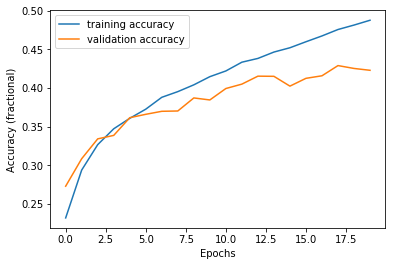

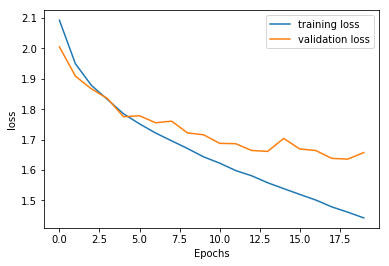

In [60]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#1. Plotting the first 10 cifar10 images
# fig, axes = plt.subplots(1, 10, figsize=(10,5))
# for img, ax in zip(x_train[:10], axes):
#   ax.imshow(img)
# plt.show()

#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train_norm = np.float32(x_train/255.0)
x_test_norm = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)

#3. function to convert to grayscale
def grayscale(data, dtype='float32'):
  # luma coding weighted average in video systems
  r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
  rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
  # add channel dimension
  rst = np.expand_dims(rst, axis=3)
  return rst

#function Call
X_train_gray = grayscale(x_train_norm)
X_test_gray = grayscale(x_test_norm)


#plot a few grayscale vrs rgb
fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(x_test[:10], axes):
  ax.imshow(img)
plt.show()

fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(X_test_gray[:10], axes):
  ax.imshow(img[:,:,0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

#create ANN model
#model constants

#define network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 1)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(X_train_gray, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(X_test_gray, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(X_test_gray)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')


L2-norm regularization

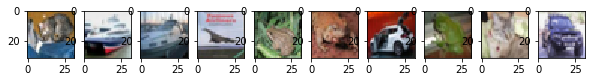

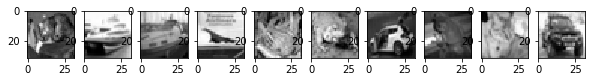

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 6s 153us/sample - loss: 2.3419 - acc: 0.2262 - val_loss: 2.1685 - val_acc: 0.2467
Epoch 2/20
40000/40000 [==============================] - 5s 137us/sample - loss: 2.0735 - acc: 0.2880 - val_loss: 2.0154 - val_acc: 0.2957
Epoch 3/20
40000/40000 [==============================] - 5s 137us/sample - loss: 1.9953 - acc: 0.3146 - val_loss: 1.9592 - val_acc: 0.3197
Epoch 4/20
40000/40000 [==============================] - 6s 139us/sample - loss: 1.9417 - acc: 0.3321 - val_loss: 1.9512 - val_acc: 0.3190
Epoch 5/20
40000/40000 [==============================] - 6s 140us/sample - loss: 1.9130 - acc: 0.3426 - val_loss: 1.8950 - val_acc: 0.3437
Epoch 6/20
40000/40000 [==============================] - 6s 138us/sample - loss: 1.8769 - acc: 0.3578 - val_loss: 1.8766 - val_acc: 0.3512
Epoch 7/20
40000/40000 [==============================] - 6s 141us/sample - loss: 1.8569 - acc: 0.3609 - val_l

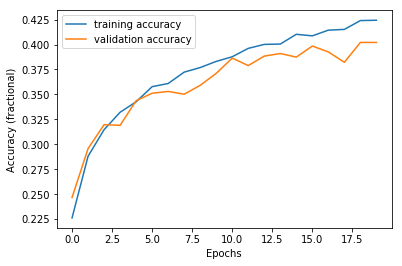

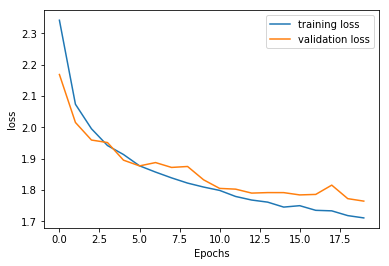

In [62]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import regularizers

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#1. Plotting the first 10 cifar10 images
# fig, axes = plt.subplots(1, 10, figsize=(10,5))
# for img, ax in zip(x_train[:10], axes):
#   ax.imshow(img)
# plt.show()

#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train_norm = np.float32(x_train/255.0)
x_test_norm = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)

#3. function to convert to grayscale
def grayscale(data, dtype='float32'):
  # luma coding weighted average in video systems
  r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
  rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
  # add channel dimension
  rst = np.expand_dims(rst, axis=3)
  return rst

#function Call
X_train_gray = grayscale(x_train_norm)
X_test_gray = grayscale(x_test_norm)


#plot a few grayscale vrs rgb
fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(x_test[:10], axes):
  ax.imshow(img)
plt.show()

fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(X_test_gray[:10], axes):
  ax.imshow(img[:,:,0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

#create ANN model
#model constants

#define network
l2_alpha = 0.0005

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 1)),
    keras.layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dense(10, activation = 'softmax')
])

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(X_train_gray, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(X_test_gray, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(X_test_gray)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')


dropout

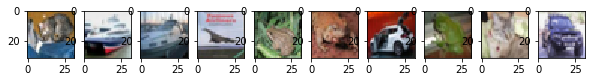

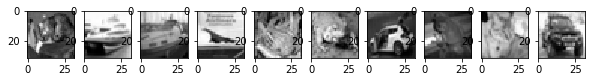

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 5s 137us/sample - loss: 2.4127 - acc: 0.1887 - val_loss: 2.1634 - val_acc: 0.2649
Epoch 2/20
40000/40000 [==============================] - 5s 130us/sample - loss: 2.1266 - acc: 0.2652 - val_loss: 2.0389 - val_acc: 0.2939
Epoch 3/20
40000/40000 [==============================] - 5s 131us/sample - loss: 2.0335 - acc: 0.2978 - val_loss: 1.9798 - val_acc: 0.3131
Epoch 4/20
40000/40000 [==============================] - 5s 133us/sample - loss: 1.9858 - acc: 0.3128 - val_loss: 1.9326 - val_acc: 0.3279
Epoch 5/20
40000/40000 [==============================] - 5s 130us/sample - loss: 1.9552 - acc: 0.3249 - val_loss: 1.8916 - val_acc: 0.3490
Epoch 6/20
40000/40000 [==============================] - 5s 129us/sample - loss: 1.9191 - acc: 0.3386 - val_loss: 1.8870 - val_acc: 0.3452
Epoch 7/20
40000/40000 [==============================] - 5s 132us/sample - loss: 1.8969 - acc: 0.3451 - val_l

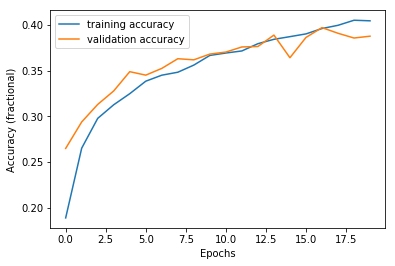

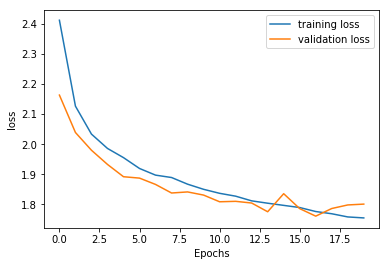

In [3]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import regularizers

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#1. Plotting the first 10 cifar10 images
# fig, axes = plt.subplots(1, 10, figsize=(10,5))
# for img, ax in zip(x_train[:10], axes):
#   ax.imshow(img)
# plt.show()

#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train_norm = np.float32(x_train/255.0)
x_test_norm = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)

#3. function to convert to grayscale
def grayscale(data, dtype='float32'):
  # luma coding weighted average in video systems
  r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
  rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
  # add channel dimension
  rst = np.expand_dims(rst, axis=3)
  return rst

#function Call
X_train_gray = grayscale(x_train_norm)
X_test_gray = grayscale(x_test_norm)


#plot a few grayscale vrs rgb
fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(x_test[:10], axes):
  ax.imshow(img)
plt.show()

fig, axes = plt.subplots(1, 10, figsize=(10,5))
for img, ax in zip(X_test_gray[:10], axes):
  ax.imshow(img[:,:,0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

#create ANN model
#model constants

#define network
l2_alpha = 0.0005
drop_rate = 0.2

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 1)),
    keras.layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(l2_alpha)),
    keras.layers.Dropout(drop_rate, noise_shape=None, seed=None),
    keras.layers.Dense(10, activation = 'softmax'),
])

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(X_train_gray, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(X_test_gray, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(X_test_gray)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')
